<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/ML08_06_2024_commented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/projekt_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#%pip install openpyxl

In [ ]:
# wczytywanie danych z pliku do DataFrame
df = pd.read_csv(r'NY-House-Dataset.csv',sep=';',
                 index_col =  False,
                 on_bad_lines='skip')


In [ ]:
# Wczytywanie nagłówków z pliku oraz konwersja do typu list
headers = pd.read_csv(r'NY-House-Dataset.csv', sep=';',nrows=0)
header_names = headers.columns.tolist()

In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


C:\Users\jabko\AppData\Local\Temp\ipykernel_3356\2741625769.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['density'] = df['LATITUDE'].fillna(method='pad')


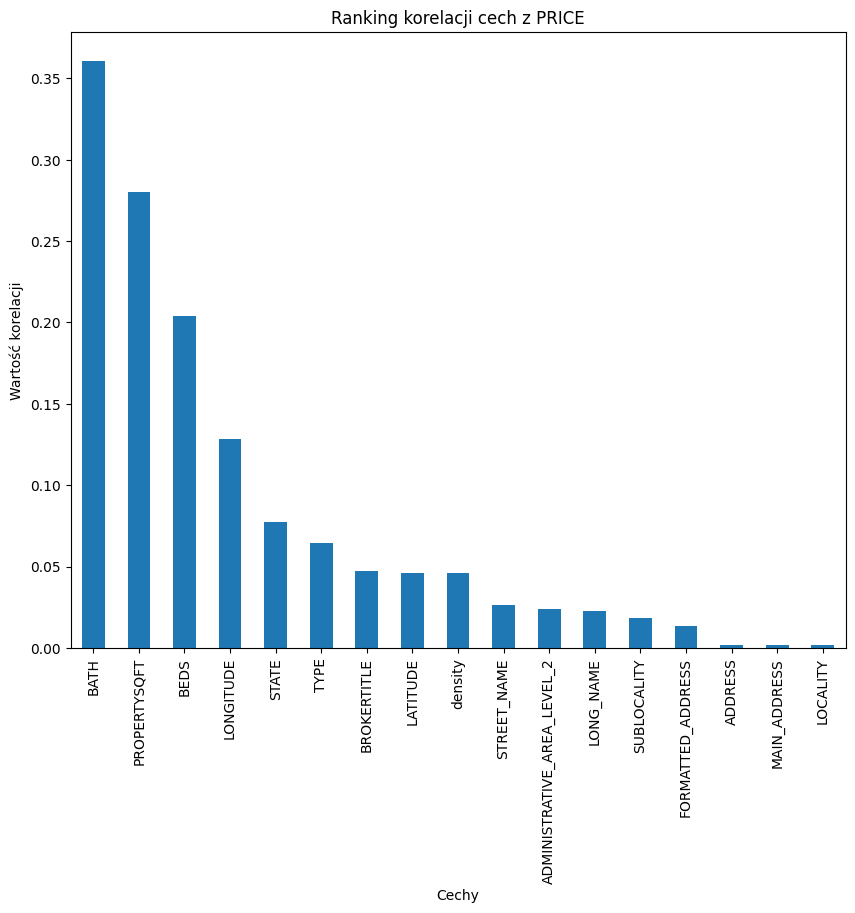

Pozostałe cechy: Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'STATE',
       'LATITUDE', 'LONGITUDE', 'density'],
      dtype='object')


In [ ]:
# Wczytanie danych
df = pd.read_csv('NY-House-Dataset.csv', sep=';', on_bad_lines='skip')

# Kodowanie kolumn tekstowych na numeryczne
label_encoder = preprocessing.LabelEncoder()
df['BROKERTITLE'] = label_encoder.fit_transform(df['BROKERTITLE'].astype(str))
df['TYPE'] = label_encoder.fit_transform(df['TYPE'].astype(str))
df['ADDRESS'] = label_encoder.fit_transform(df['ADDRESS'].astype(str))
df['STATE'] = label_encoder.fit_transform(df['STATE'].astype(str))
df['MAIN_ADDRESS'] = label_encoder.fit_transform(df['MAIN_ADDRESS'].astype(str))
df['ADMINISTRATIVE_AREA_LEVEL_2'] = label_encoder.fit_transform(df['ADMINISTRATIVE_AREA_LEVEL_2'].astype(str))
df['LOCALITY'] = label_encoder.fit_transform(df['LOCALITY'].astype(str))
df['SUBLOCALITY'] = label_encoder.fit_transform(df['SUBLOCALITY'].astype(str))
df['STREET_NAME'] = label_encoder.fit_transform(df['STREET_NAME'].astype(str))
df['LONG_NAME'] = label_encoder.fit_transform(df['LONG_NAME'].astype(str))
df['FORMATTED_ADDRESS'] = label_encoder.fit_transform(df['FORMATTED_ADDRESS'].astype(str))

# Czyszczenie danych
for column in num_columns:
    df[column] = df[column].replace({'': np.nan})
df['density'] = df['LATITUDE'].fillna(method='pad')

# Usuwanie wartości odstających
columns_X = [col for col in df.columns if col != 'PRICE']
for column in df[columns_X]:
    if df[column].dtype in [np.float64, np.int64]:
        df[column] = np.abs(df[column])
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df.drop(df.loc[df[column] > (Q3 + 1.5 * IQR)].index)
        df = df.drop(df.loc[df[column] < (Q1 - 1.5 * IQR)].index)

# Normalizacja danych
df_X = df.drop(columns=['PRICE'])
scaler = preprocessing.StandardScaler().fit(df_X)
numerical_columns = df_X.select_dtypes(include=[float, int]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Obliczenie korelacji z PRICE
corr_price = df.corr()['PRICE'].drop('PRICE').abs()
corr_price_sort = corr_price.sort_values(ascending=False)

# Usunięcie dwóch cech o najmniejszej korelacji z PRICE
features_to_drop = corr_price_sort.nsmallest(8).index
df_reduced = df.drop(columns=features_to_drop)



# Wykres korelacji
plt.figure(figsize=(10, 8))
corr_price_sort.plot.bar()
plt.title('Ranking korelacji cech z PRICE')
plt.xlabel('Cechy')
plt.ylabel('Wartość korelacji')
plt.show()

# Wyświetlenie pozostałych cech
print("Pozostałe cechy:", df_reduced.columns)

In [ ]:
df.to_excel('test.xlsx')

In [ ]:
# Wybranie zmiennych X i Y
print(features_to_drop)
X_df = df_reduced[['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'BROKERTITLE', 'TYPE', 'STATE', ]]
Y_df = df_reduced['PRICE']

# Podział na zestawy treningowe i testowe
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, random_state=42)


Index(['LOCALITY', 'MAIN_ADDRESS', 'ADDRESS', 'FORMATTED_ADDRESS',
       'SUBLOCALITY', 'LONG_NAME', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'STREET_NAME'],
      dtype='object')


In [ ]:
print(df['BEDS'])

0      -0.559340
3       0.164657
6      -0.559340
8      -1.283338
9      -0.559340
          ...   
4796   -1.283338
4797   -1.283338
4798   -1.283338
4799   -0.559340
4800   -1.283338
Name: BEDS, Length: 4098, dtype: float64


<Axes: >

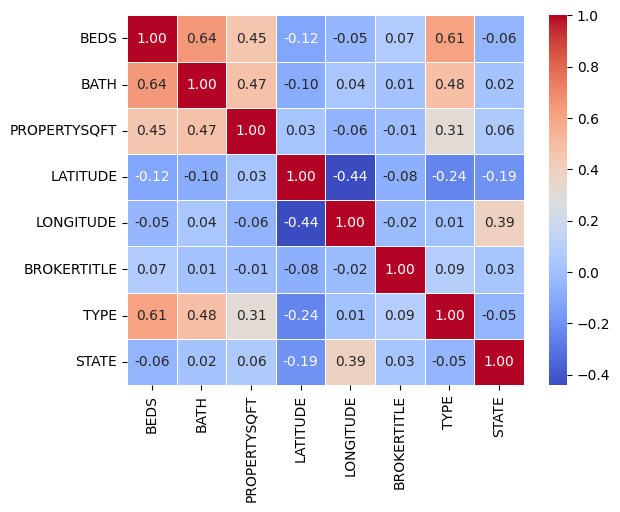

In [ ]:
# Poniższy kod ma na celu wybór określonych kolumn z DataFrame, a następnie wizualizację korelacji między nimi za pomocą mapy cieplnej (heatmap)
sns.heatmap(X_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

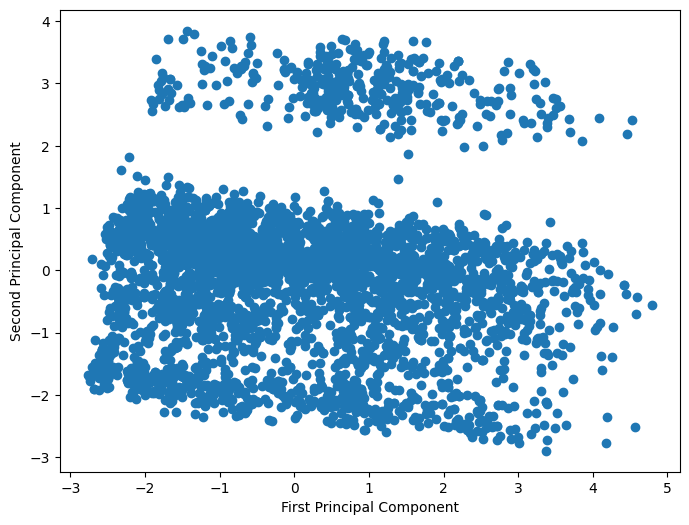

In [ ]:
# Usunięcie brakujących wartości z wybranego zbioru danych
selected_df = X_df.dropna()
# Przeprowadzenie PCA na wybranym zbiorze danych
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_df)
# Utworzenie DataFrame z wynikami PCA
df_pca = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

# Wizualizacja wyników PCA na wykresie punktowym
plt.figure(figsize=(8,6))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
df.dtypes

BROKERTITLE                    float64
TYPE                           float64
PRICE                            int64
BEDS                           float64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                        float64
STATE                          float64
MAIN_ADDRESS                   float64
ADMINISTRATIVE_AREA_LEVEL_2    float64
LOCALITY                       float64
SUBLOCALITY                    float64
STREET_NAME                    float64
LONG_NAME                      float64
FORMATTED_ADDRESS              float64
LATITUDE                       float64
LONGITUDE                      float64
density                        float64
dtype: object

REGRESJA LINIOWA

In [ ]:
# Inicjalizacja i trenowanie modelu regresji liniowej
reg = LinearRegression().fit(X_train, Y_train)
# Współczynniki regresji liniowej
reg.coef_
reg.intercept_
# Przewidywanie wartości na zbiorze testowym

y_predict = reg.predict(X_test)

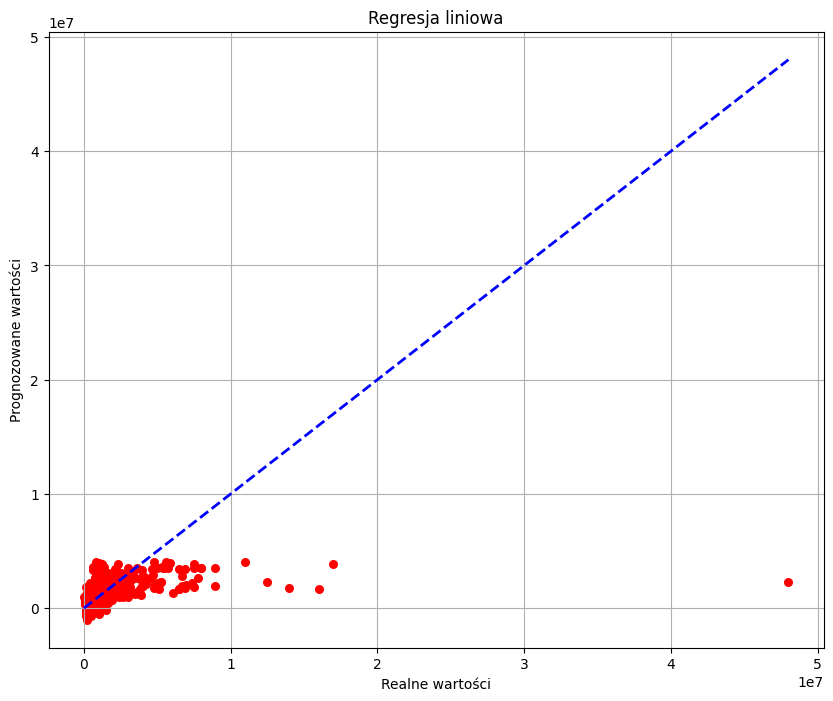

In [ ]:
plt.figure(figsize=(10, 8))
# Wykres punktowy rzeczywistych vs przewidywanych wartości
plt.scatter(Y_test, y_predict, color='red', s=30)
# Linia idealnego dopasowania
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='blue', linestyle='--', linewidth=2)
plt.xlabel('Realne wartości')
plt.ylabel('Prognozowane wartości')
plt.title('Regresja liniowa')
plt.grid(True)
plt.show()

In [ ]:
# Przypisanie rzeczywistych wartości z danych testowych do zmiennej y_true
y_true = Y_test
# Obliczenie średniego błędu bezwzględnego (mean absolute error, MAE) między rzeczywistymi wartościami y_true a prognozowanymi wartościami y_predict
# mean_absolute_error() jest funkcją z biblioteki sklearn.metrics, która oblicza MAE
# y_true to rzeczywiste wartości, a y_predict to prognozowane wartości przez model regresji liniowej
print("Regresja liniowa średni błąd: ",mean_absolute_error( y_true,y_predict))

Regresja liniowa średni błąd:  782641.3610048136


Średni błąd bezwzględny regresji liniowej wynosi 782641.36. Wysoki MAE oznacza, że model ma znaczną średnią różnicę między przewidywanymi a rzeczywistymi wartościami.

In [ ]:
# Przypisanie zmiennej y_true wartości y_test
y_true = Y_test
# Obliczenie średniego błędu bezwzględnego (MAE)
median_absolute_error(y_true,y_predict)

467250.4965882306

Mediana błędu absolutnego wynosi 467250.50. Mediana jest niższa niż MAE, co sugeruje, że większość przewidywań jest bardziej dokładna, ale kilka dużych błędów wpływa na średnią.

In [ ]:
# Przypisanie zmiennej y_true wartości y_test
y_true = Y_test
# Obliczenie współczynnika determinacji (R^2)
r2_score(y_true,y_predict)

0.152728883977571

Współczynnik determinacji R² wynosi 0.1527. Wynik R² wskazuje, że model wyjaśnia około 15.27% wariancji w danych testowych, co oznacza, że model jest słabo dopasowany do danych.

HUBER REGRESSOR

In [ ]:
# Tworzy instancję modelu HuberRegressor i dopasowuje go do danych treningowych X_train i y_train.
huber_model = HuberRegressor().fit(X_train, Y_train)
# Wywołanie metody score() modelu huber_model w celu obliczenia współczynnika determinacji R^2 , dla danych treningowych X_train i Y_train. Metoda score() zwraca ocenę modelu,
huber_model.score(X_train, Y_train)
# Pobiera współczynniki (coef_) modelu dopasowanego do danych treningowyc
huber_model.coef_
# Pobiera wyraz wolny (intercept_) modelu dopasowanego do danych treningowych.
huber_model.intercept_
# Dokonuje przewidywań na podstawie danych testowych X_test przy użyciu dopasowanego modelu.
y_predict_huber = np.round(huber_model.predict(X_test))
print(y_predict_huber)

[ 484961.  488109.  875034. ... 1065306.  553943.  715212.]


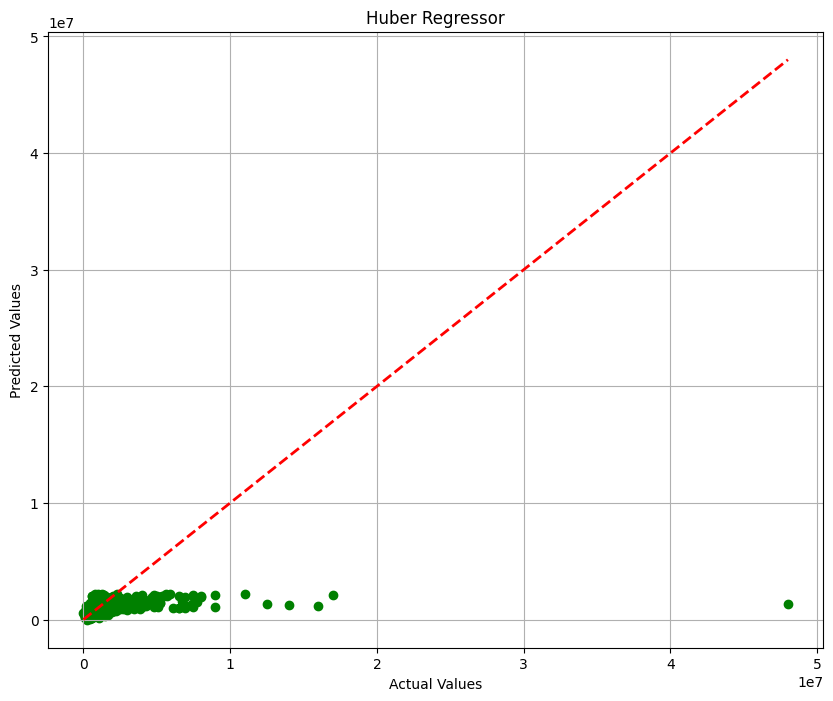

In [ ]:
plt.figure(figsize=(10, 8))
# Rysowanie punktowego wykresu rzeczywistych wartości (y_test) w porównaniu do przewidywanych wartości (y_predict_huber)
plt.scatter(Y_test, y_predict_huber, color='green')
# Rysowanie linii referencyjnej o współczynniku nachylenia 1 (linia idealnego dopasowania)
# Linia ta przechodzi przez minimalną i maksymalną wartość rzeczywistych danych (y_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(),Y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Huber Regressor')
plt.grid(True)
plt.show()

SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 0.9%

In [ ]:
# Przypisuje zmiennej y_true rzeczywiste wartości celów z danych testowych (y_test).
y_true = Y_test
# Oblicza współczynnik determinacji (R^2) pomiędzy rzeczywistymi wartościami (y_true) a przewidywanymi wartościami (y_predict_huber).
r2_score(y_true,y_predict_huber)

0.09055516613352987

In [ ]:
print("MAE:",mean_absolute_error(y_true,y_predict_huber))

MAE: 640458.3814634146


Średni błąd absolutny wynosi 640458.38. Wysoki MAE wskazuje na znaczną średnią różnicę między przewidywanymi a rzeczywistymi wartościami, co oznacza, że model nie przewiduje wartości z dużą dokładnością.

In [ ]:
print("regresja Hubera",median_absolute_error(y_true,y_predict_huber))

regresja Hubera 265348.0


Mediana błędu absolutnego wynosi 265348.0. Mediana jest niższa niż MAE, co sugeruje, że większość przewidywań jest bardziej dokładna, ale obecność kilku dużych błędów znacząco wpływa na MAE.

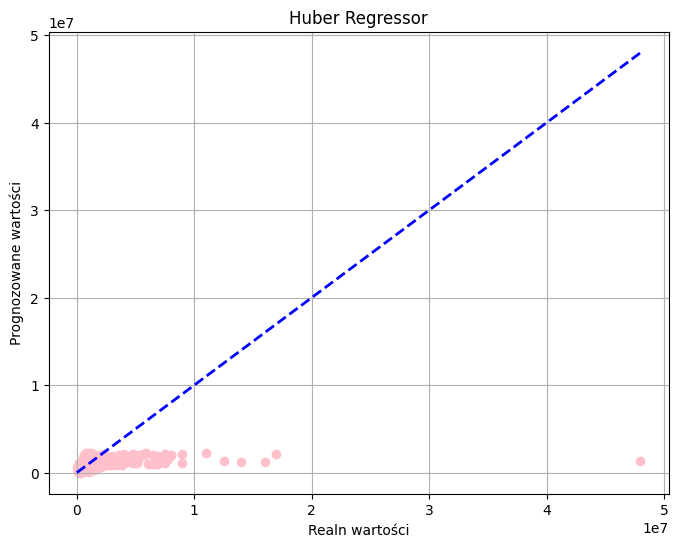

In [ ]:
plt.figure(figsize=(8, 6))
# Tworzenie wykresu rozrzutu (scatter plot) rzeczywistych wartości Y_test w odniesieniu do prognozowanych wartości y_predict_huber
plt.scatter(Y_test, y_predict_huber, color='pink')
# Dodanie linii odniesienia (identity line) dla porównania rzeczywistych wartości z prognozowanymi wartościami
# Linia ta rozciąga się od minimum do maksimum wartości Y_test
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='blue', linestyle='--', linewidth=2)
plt.xlabel('Realn wartości')
plt.ylabel('Prognozowane wartości')
plt.title('Huber Regressor')
plt.grid(True)
plt.show()

Regresja wielomianowa 2 stopnia

In [ ]:
# Tworzy pipeline zawierający dwa kroki:
# 1. Tworzenie cech wielomianowych stopnia drugiego (PolynomialFeatures(degree=2)).
# 2. Regresję liniową (LinearRegression()).
degree2_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])
# Dopasowuje pipeline do danych treningowych X_train i Y_train.
degree2_pipeline.fit(X_train, Y_train)
# Dokonuje przewidywań na podstawie danych testowych X_test przy użyciu dopasowanego pipeline.
predictions_degree2 = degree2_pipeline.predict(X_test)
# Oblicza współczynnik determinacji (R^2) pomiędzy rzeczywistymi wartościami z y_test a przewidywanymi wartościami z regresji wielomianowej.
r2_degree2 = r2_score(Y_test, predictions_degree2)
# Wypisuje wynik R^2 dla regresji wielomianowej drugiego stopnia.
print("Wynik R^2 dla regresji 2. stopnia:", r2_degree2)

Wynik R^2 dla regresji 2. stopnia: 0.24732140832250937


Współczynnik determinacji R² dla regresji 2. stopnia wynosi 0.2473. Wynik R² sugeruje, że model wyjaśnia około 24.73% wariancji w danych testowych. Jest to poprawa w porównaniu z regresją Hubera, ale nadal wskazuje, że model nie jest idealnie dopasowany do danych

In [ ]:
print(predictions_degree2)

[ 981102.43872155    4931.16439693 1277431.07148909 ... 1889827.64248805
 -108628.16747211  590590.41016658]


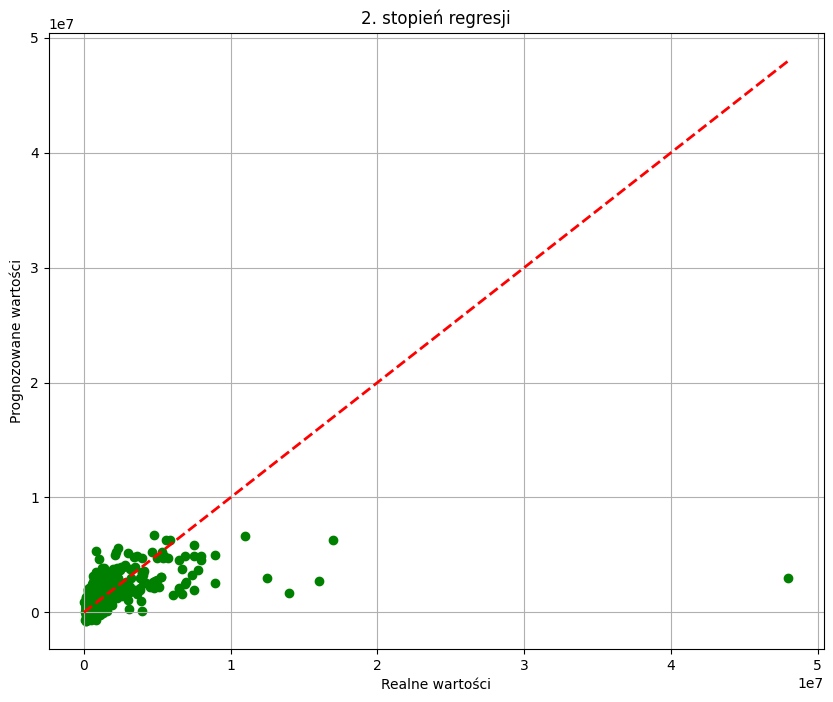

In [ ]:

plt.figure(figsize=(10, 8))
# Rysuje wykres punktowy (scatter plot) rzeczywistych wartości z y_test przeciwko przewidywanym wartościom z predictions_degree2.
plt.scatter(Y_test, predictions_degree2, color='green')
# Rysuje linię prostą od minimalnej do maksymalnej wartości y_test.
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Realne wartości')
plt.ylabel('Prognozowane wartości')
plt.title('2. stopień regresji')
plt.grid(True)
plt.show()

Regresja wielomianowa 3 stopnia

In [ ]:
# Tworzy pipeline zawierający dwa kroki:
# 1. Tworzenie cech wielomianowych stopnia trzeciego (PolynomialFeatures(degree=3)).
# 2. Regresję liniową (LinearRegression()).
degree3_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])
# Dopasowuje pipeline do danych treningowych X_train i Y_train.
degree3_pipeline.fit(X_train, Y_train)
# Dokonuje przewidywań na podstawie danych testowych X_test przy użyciu dopasowanego pipeline i zaokrągla przewidywane wartości.
predictions_degree3 = np.round(degree3_pipeline.predict(X_test))
# Wypisuje wynik R^2 dla regresji wielomianowej trzeciego stopnia na danych testowych.
print("3 stopien r2 ", degree3_pipeline.score(X_test, Y_test))

3 stopien r2  0.31676441623862606


Współczynnik determinacji R² dla regresji 3. stopnia wynosi 0.3168. Wynik R² sugeruje, że model wyjaśnia około 31.68% wariancji w danych testowych. Jest to lepszy wynik w porównaniu do regresji wielomianowej 2. stopnia

In [ ]:
print(predictions_degree3)

[ 631788. -108504.  968259. ... 1505530.  786243.  508024.]


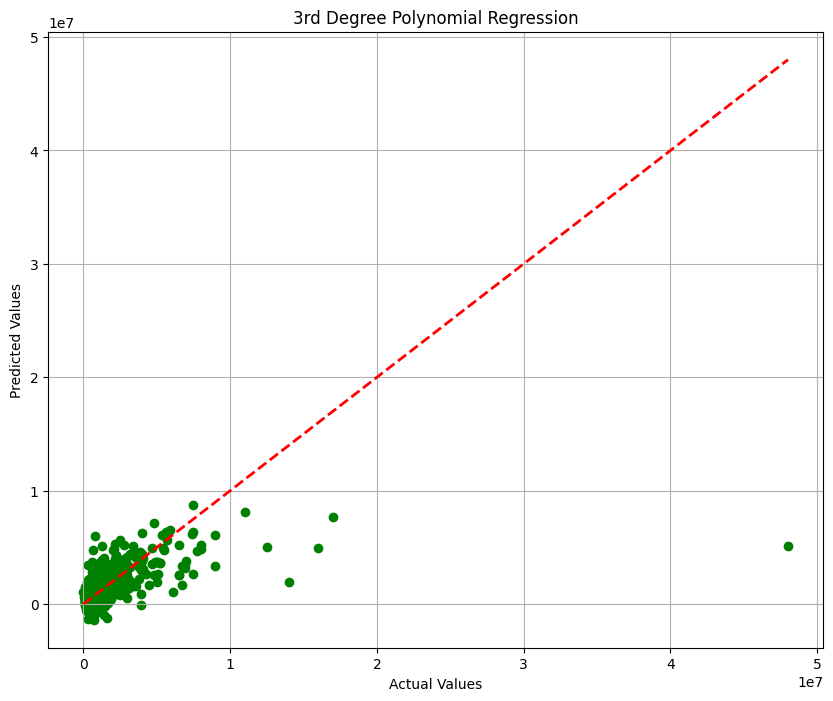

In [ ]:

plt.figure(figsize=(10, 8))
# Rysuje wykres punktowy (scatter plot) rzeczywistych wartości z y_test przeciwko przewidywanym wartościom z predictions_degree3.
plt.scatter(Y_test, predictions_degree3, color='green')
# Rysuje linię prostą od minimalnej do maksymalnej wartości y_test.
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('3rd Degree Polynomial Regression')
plt.grid(True)
plt.show()

Cross Validation dla modeli

In [ ]:
#Liniowa regresja
# Inicjalizacja obiektu RepeatedKFold, który wykonuje 5-krotne przekroczone walidacje (k-fold) powtarzane 3 razy
# random_state=42 zapewnia powtarzalność wyników poprzez ustalenie ziarna generatora liczb losowych
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
# Inicjalizacja modelu regresji liniowej
lin = LinearRegression()
# Obliczenie wyników przekrojonej walidacji dla modelu regresji liniowej
# cross_val_score() oblicza wyniki dla modelu lin na danych X_df i Y_df
# cv=rkf oznacza, że używamy obiektu RepeatedKFold jako strategii walidacji
# scoring='neg_mean_absolute_error' oznacza, że używamy negatywnej średniej wartości bezwzględnej jako miary błędu
cv_scores_lin = cross_val_score(lin, X_df , Y_df, cv=rkf, scoring='neg_mean_absolute_error')
# Wypisanie wyników przekrojonej walidacji
print(cv_scores_lin)

[-789607.5282112  -697282.13878182 -708573.78072715 -803009.72723229
 -781250.01865529 -774804.39825686 -728499.58306392 -765750.5702476
 -731710.45844383 -777487.61116175 -746515.82144029 -764345.91731652
 -713244.6660825  -750483.16119739 -802054.64040177]


In [ ]:
#cross knn
# Inicjalizacja modelu KNeighborsRegressor z 3 najbliższymi sąsiadami
knn_model = KNeighborsRegressor(n_neighbors=3)
# Obliczenie wyników przekrojonej walidacji dla modelu KNeighborsRegressor
# cross_val_score() oblicza wyniki dla modelu knn_model na danych X_df i Y_df
# cv=rkf oznacza, że używamy obiektu RepeatedKFold jako strategii walidacji
# scoring='neg_mean_absolute_error' oznacza, że używamy negatywnej średniej wartości bezwzględnej jako miary błędu
cross_val_scores_knn = cross_val_score(knn_model, X_df, Y_df, cv=rkf, scoring='neg_mean_absolute_error')
# Wypisanie wyników przekrojonej walidacji
print(cross_val_scores_knn)

[-506148.6402439  -443209.43617886 -511259.10731707 -508417.34920635
 -596650.05616606 -537630.41463415 -432994.22357724 -524619.44430894
 -487051.38909239 -556239.36304436 -519952.24593496 -539744.74796748
 -483243.30813008 -505747.45095645 -527976.32315832]


In [ ]:
#cross huber
# Inicjalizacja obiektu RepeatedKFold, który wykonuje 5-krotne przekroczone walidacje (k-fold) powtarzane 3 razy
# random_state=42 zapewnia powtarzalność wyników poprzez ustalenie ziarna generatora liczb losowych
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
# Inicjalizacja modelu HuberRegressor
hub = HuberRegressor()
# Obliczenie wyników przekrojonej walidacji dla modelu HuberRegressor
# cross_val_score() oblicza wyniki dla modelu hub na danych X_df i Y_df
# cv=rkf oznacza, że używamy obiektu RepeatedKFold jako strategii walidacji
# scoring='neg_mean_absolute_error' oznacza, że używamy negatywnej średniej wartości bezwzględnej jako miary błędu
cv_scores_hub = cross_val_score(hub, X_df , Y_df, cv=rkf, scoring='neg_mean_absolute_error')
# Wypisanie wyników przekrojonej walidacji
print(cv_scores_hub)

[-645670.25751199 -563329.50617267 -597969.49374445 -664415.98452401
 -680727.70533685 -641835.02246174 -582690.91269036 -616152.82453878
 -612950.76125839 -696753.1958287  -611129.89188639 -648222.97116009
 -600225.42616226 -598154.80248535 -692968.68989676]


In [ ]:
#cross 2 stopien
# Inicjalizacja obiektu RepeatedKFold, który wykonuje 5-krotne przekroczone walidacje (k-fold) powtarzane 3 razy
# random_state=42 zapewnia powtarzalność wyników poprzez ustalenie ziarna generatora liczb losowych
repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
# Inicjalizacja modelu regresji liniowej
linear_model = LinearRegression()
# Inicjalizacja obiektu PolynomialFeatures do transformacji danych na drugi stopień wielomianu
poly_features_2 = PolynomialFeatures(2)
# Przekształcenie danych X_df do drugiego stopnia wielomianu
X_transformed = poly_features_2.fit_transform(X_df)
# Obliczenie wyników przekrojonej walidacji dla modelu regresji liniowej na przekształconych danych
# cross_val_score() oblicza wyniki dla modelu linear_model na danych X_transformed i Y_df
# cv=repeat_kfold oznacza, że używamy obiektu RepeatedKFold jako strategii walidacji
# scoring='neg_mean_absolute_error' oznacza, że używamy negatywnej średniej wartości bezwzględnej jako miary błędu
cross_val_scores_2nd_degree = cross_val_score(linear_model, X_transformed, Y_df, cv=repeat_kfold, scoring='neg_mean_absolute_error')
# Wypisanie wyników przekrojonej walidacji
print(cross_val_scores_2nd_degree)

[-687546.8851334  -624347.0874238  -655283.79769629 -705890.55641583
 -684497.31154897 -703226.60019891 -649890.76808721 -674973.62523551
 -635840.8338734  -698561.9413229  -657313.79425846 -693618.0365028
 -640676.69947119 -658878.43557708 -705379.72199566]


In [ ]:
#cross 3 stopien
# Inicjalizacja obiektu RepeatedKFold, który wykonuje 5-krotne przekroczone walidacje (k-fold) powtarzane 3 razy
# random_state=42 zapewnia powtarzalność wyników poprzez ustalenie ziarna generatora liczb losowych
repeat_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
# Inicjalizacja modelu regresji liniowej
linear_model = LinearRegression()
# Inicjalizacja obiektu PolynomialFeatures do transformacji danych na trzeci stopień wielomianu
poly_features_3 = PolynomialFeatures(3)
# Przekształcenie danych X_df do trzeciego stopnia wielomianu
X_transformed_3 = poly_features_3.fit_transform(X_df)
# Obliczenie wyników przekrojonej walidacji dla modelu regresji liniowej na przekształconych danych
# cross_val_score() oblicza wyniki dla modelu linear_model na danych X_transformed_3 i Y_df
# cv=repeat_kfold oznacza, że używamy obiektu RepeatedKFold jako strategii walidacji
# scoring='neg_mean_absolute_error' oznacza, że używamy negatywnej średniej wartości bezwzględnej jako miary błędu
cross_val_scores_3rd_degree = cross_val_score(linear_model, X_transformed_3, Y_df, cv=repeat_kfold, scoring='neg_mean_absolute_error')
# Wypisanie wyników przekrojonej walidacji
print(cross_val_scores_3rd_degree)

[-687624.92407114 -606565.82461921 -667699.79172208 -694095.63803169
 -693225.04621402 -710576.73919913 -647409.65530834 -672193.88237861
 -646665.17420285 -696676.64274137 -657895.20630562 -679814.28405942
 -643786.72998794 -661317.41813777 -712796.57346458]


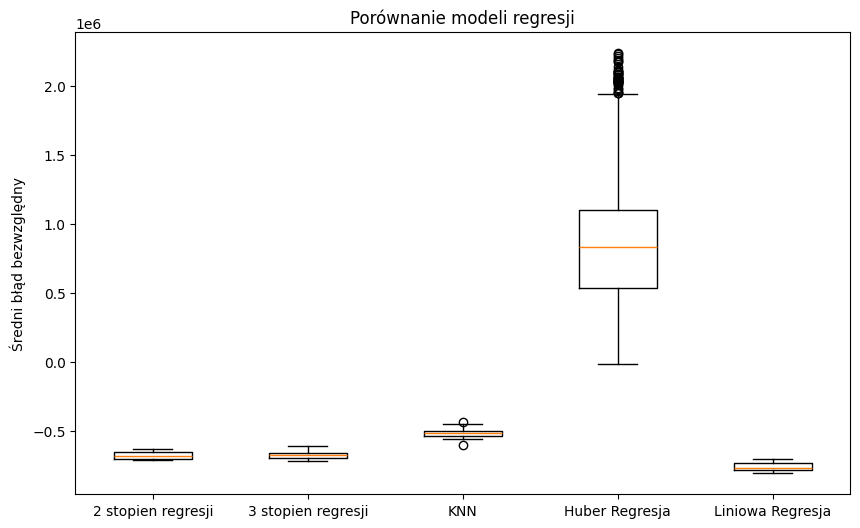

In [ ]:
#boxplot dla wszystkich modeli
plt.figure(figsize=(10, 6))
# Tworzenie wykresu pudełkowego (boxplot) dla wyników walidacji krzyżowej różnych modeli regresji
plt.boxplot([cross_val_scores_2nd_degree, cross_val_scores_3rd_degree, cross_val_scores_knn,predictions_huber, cv_scores_lin])
# Ustawienie etykiet dla osi X, aby oznaczać różne modele
plt.xticks([1, 2, 3, 4, 5], ['2 stopien regresji', '3 stopien regresji', 'KNN', 'Huber Regresja','Liniowa Regresja'])
plt.ylabel('Średni błąd bezwzględny')
plt.title('Porównanie modeli regresji')
plt.show()


Modele regresji wielomianowej 2 i 3 stopnia osiągają najniższy średni błąd absolutny, co wskazuje na ich lepszą dokładność, modele KNN i liniowej regresji mają wyższy błąd niż modele wielomianowe, ale niższy niż regresja Hubera, która ma najwyższy średni błąd absolutny i dużą zmienność wyników, co czyni ją najmniej dokładnym modelem.